# Daibetes Prediction
#### About Dataset
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative).

 The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. 
 
 This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
import pickle
import warnings 
warnings.filterwarnings(action='ignore')

/var/folders/06/g6p20x7x0mzf40xrgbq7xyg40000gn/T/ipykernel_1174/3454726086.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("/Users/anirudhsharma/Desktop/Machine Learning/Projects/Diabetes_Predictor/Datasets/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

**Note:** The dataset exhibits a significant class imbalance, characterized by a substantial majority of non-diabetic individuals juxtaposed with a comparatively small representation of diabetic individuals. This observed discrepancy in class distribution indicates an imbalance within the dataset. Such class imbalances can significantly influence the performance and generalizability of machine learning models trained on this data. In addressing this issue, it is imperative to employ rigorous methodologies to mitigate the potential biases stemming from the uneven representation of classes.

## Exploratory Data Analysis

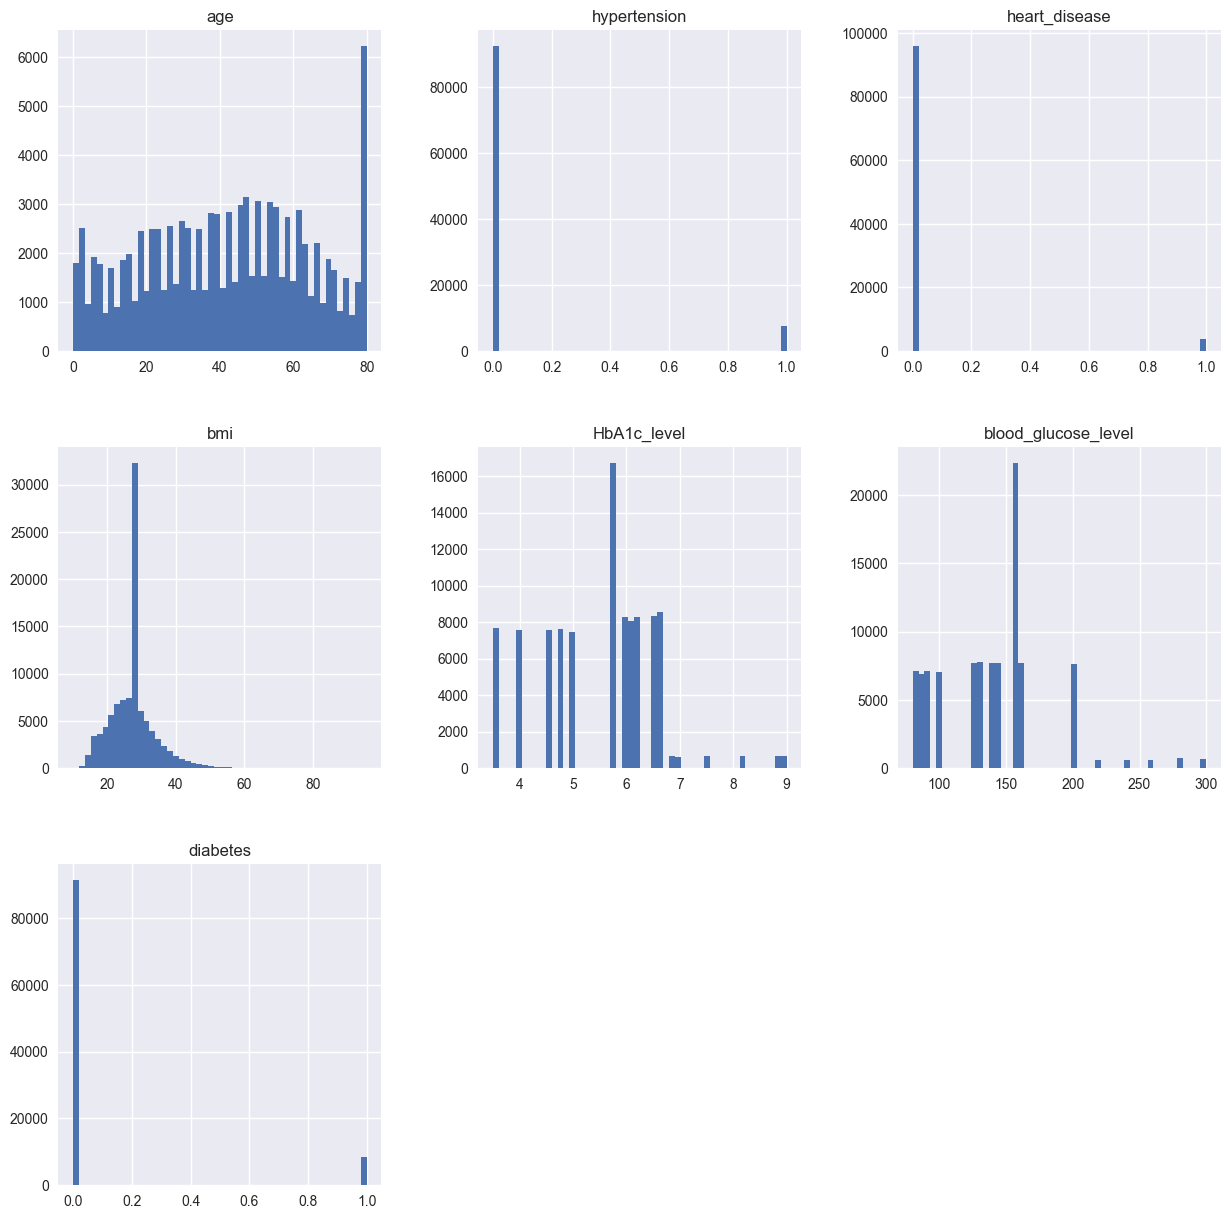

In [6]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(15,15))
plt.show()

In [7]:
percentage=df['diabetes'].value_counts(normalize=True)*100

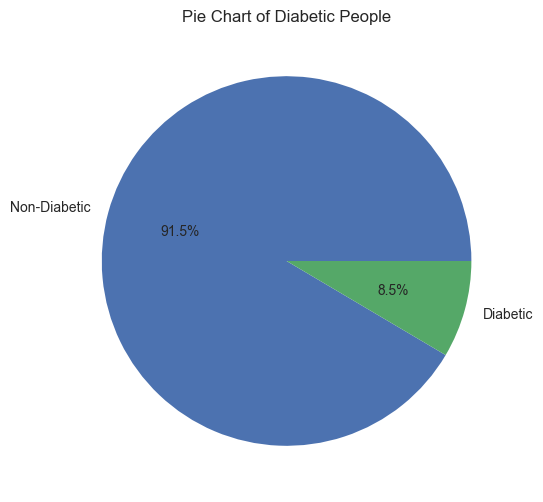

In [8]:
classlabels=['Non-Diabetic','Diabetic']
plt.figure(figsize=(12,6))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie Chart of Diabetic People')
plt.show()

<Axes: >

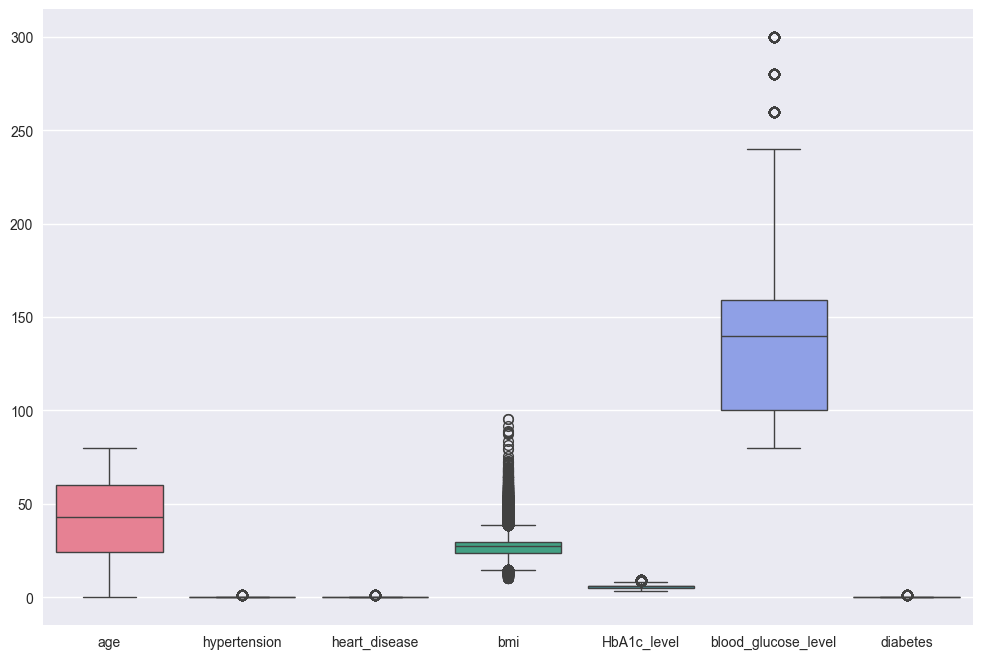

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

Text(0.5, 1.0, 'Analysis of Diabetes according to gender')

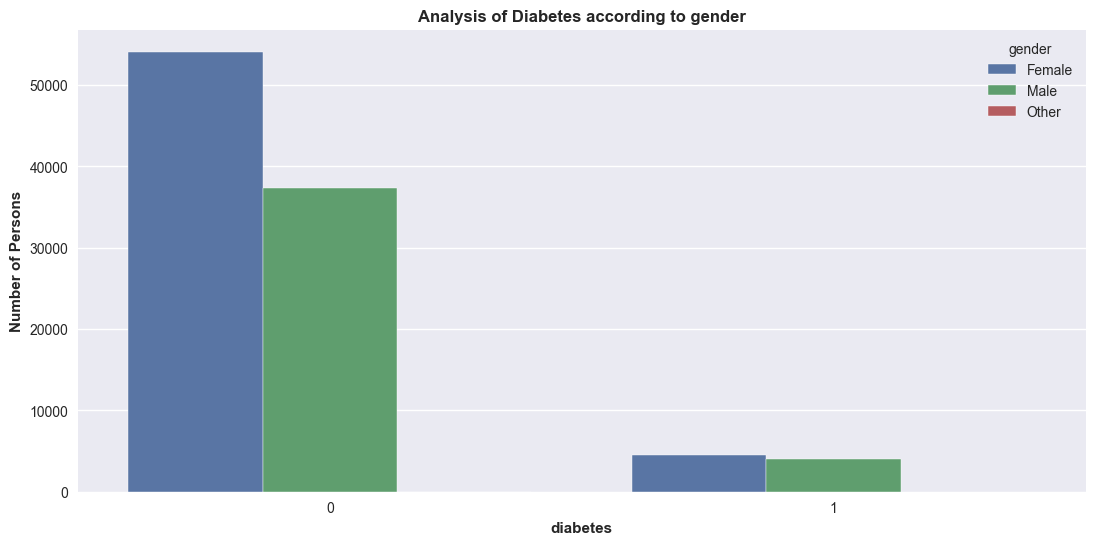

In [10]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='diabetes',hue='gender',data=df)
plt.ylabel('Number of Persons',weight='bold')
plt.xlabel('diabetes',weight='bold')
plt.title("Analysis of Diabetes according to gender",weight='bold')

## Feature Engineering

In [11]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [12]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [13]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [14]:
df['gender']=df['gender'].map({'Female':0,'Male':1,'Other':2})

# We will fill the missing data values of 'never' because it's the mode 
df['smoking_history']=df['smoking_history'].replace('No Info', 'never')

In [15]:
df['smoking_history'].isnull().sum()

0

In [16]:
## Encoding the Dataset
encoder=OneHotEncoder()
encoded_data=pd.DataFrame(encoder.fit_transform(df[['smoking_history']]).toarray(),columns=encoder.get_feature_names_out())

In [17]:
file= open('/Users/anirudhsharma/Desktop/Machine Learning/Projects/Diabetes_Predictor/models/encoder.pkl','wb')
pickle.dump(encoder,file)

In [18]:
encoded_data

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
99995,0.0,0.0,0.0,1.0,0.0
99996,0.0,0.0,0.0,1.0,0.0
99997,0.0,0.0,1.0,0.0,0.0
99998,0.0,0.0,0.0,1.0,0.0


In [19]:
df=pd.concat([encoded_data,df],axis=1)

In [20]:
df.drop('smoking_history',axis=1,inplace=True)

In [21]:
##Standard scaler- Standardization
def standard_scaler(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    ##Saving the Model
    file=open('/Users/anirudhsharma/Desktop/Machine Learning/Projects/Diabetes_Predictor/models/standard_scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return X_train_scaled,X_test_scaled

In [22]:
#Independent and Dependent Feature
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0.0,0.0,0.0,1.0,0.0,0,80.0,0,1,25.19,6.6,140
1,0.0,0.0,0.0,1.0,0.0,0,54.0,0,0,27.32,6.6,80
2,0.0,0.0,0.0,1.0,0.0,1,28.0,0,0,27.32,5.7,158
3,1.0,0.0,0.0,0.0,0.0,0,36.0,0,0,23.45,5.0,155
4,1.0,0.0,0.0,0.0,0.0,1,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,1.0,0.0,0,80.0,0,0,27.32,6.2,90
99996,0.0,0.0,0.0,1.0,0.0,0,2.0,0,0,17.37,6.5,100
99997,0.0,0.0,1.0,0.0,0.0,1,66.0,0,0,27.83,5.7,155
99998,0.0,0.0,0.0,1.0,0.0,0,24.0,0,0,35.42,4.0,100


In [23]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [25]:
X_train_scaled , X_test_scaled=standard_scaler(X_train,X_test)

In [26]:
X_train_scaled

array([[-3.18337735e-01,  4.90262842e+00, -3.21457967e-01, ...,
        -6.19069481e-04, -4.92624842e-01,  4.14557732e-01],
       [-3.18337735e-01, -2.03972220e-01, -3.21457967e-01, ...,
        -6.19069481e-04, -1.89423192e+00,  1.69109989e-01],
       [ 3.14131782e+00, -2.03972220e-01, -3.21457967e-01, ...,
        -6.19069481e-04, -1.89423192e+00, -1.99061626e-01],
       ...,
       [-3.18337735e-01, -2.03972220e-01, -3.21457967e-01, ...,
        -1.79350769e-01,  2.54898933e-01, -1.30357647e+00],
       [-3.18337735e-01, -2.03972220e-01, -3.21457967e-01, ...,
        -3.58082468e-01,  6.28660821e-01,  4.88192055e-01],
       [-3.18337735e-01, -2.03972220e-01, -3.21457967e-01, ...,
         1.00864183e-01, -4.92624842e-01,  5.12736829e-01]])

In [27]:
classifier=LogisticRegression()
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [28]:
parameters={
    'penalty': ('l1','l2','elasticnet',None),
    'C': np.logspace(-3,3,7),
    'solver': ('newton-cg', 'sag', 'saga', 'lbfgs')
}
rscv=RandomizedSearchCV(
    estimator=classifier,
    param_distributions=parameters,
    scoring='accuracy',
    n_iter=10,
    cv=10
)
rscv.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ('l1', 'l2', 'elasticnet',
                                                    None),
                                        'solver': ('newton-cg', 'sag', 'saga',
                                                   'lbfgs')},
                   scoring='accuracy')

In [29]:
rscv.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 10.0}

In [30]:
rscv.best_score_

0.9607571428571429

Let's see how well our model performs on the test data set.

In [31]:
y_pred=rscv.predict(X_test_scaled)

In [32]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[27211   242]
 [  981  1566]]


In [33]:
acc= accuracy_score(y_test,y_pred)
print(f"Accuracy Score: {acc*100:.2f}%")

Accuracy Score: 95.92%


**Note**
- In this Scenario where we have imbalanced Dataset we cannot use Accuracy Score to analyse our Model Performance instead we use Precision , Recall , f-beta Score.

In [34]:
true_pos=cm[0][0]
false_pos=cm[0][1]
false_neg=cm[1][0]
true_neg=cm[1][1]

In [35]:
precision= true_pos/(true_pos+false_pos)
print(f"Precision: {precision*100:.2f}%")


Precision: 99.12%


In [36]:
recall= true_pos/(true_pos+false_neg)
print(f"Recall: {recall*100:.2f}%")


Recall: 96.52%


- As False Negative and False Positive both are important so we take the value of beta as 1 

So,

(1+beta^2) becomes 2

In [37]:
f_Score=2*(precision*recall)/(precision+recall)
print(f"f-beta Score: {f_Score*100:.2f}%")

f-beta Score: 97.80%


In [38]:
file=open('/Users/anirudhsharma/Desktop/Machine Learning/Projects/Diabetes_Predictor/models/prediction_model.pkl','wb')
pickle.dump(rscv,file)
file.close()